In [218]:
#import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics
import statsmodels.api as sm
import plotly.express as px #for plotting the scatter plot
import seaborn as sns #For plotting the dataset in seaborn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score 
import math
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [219]:
#Read the excel file
data=pd.read_csv('/content/datafile (1).csv')
print(data.head(5))
print(data.describe())


            state district    market commodity variety arrival_date  \
0  Andhra Pradesh  Chittor  Chittoor     Mango  Badami   10/05/2022   
1  Andhra Pradesh  Chittor  Chittoor     Mango  Badami   20/05/2022   
2  Andhra Pradesh  Chittor  Chittoor     Mango  Badami   21/05/2022   
3  Andhra Pradesh  Chittor  Chittoor     Mango  Badami   22/05/2022   
4  Andhra Pradesh  Chittor  Chittoor     Mango  Badami   23/05/2022   

   min_price  max_price  modal_price  
0     3500.0     4000.0         3750  
1     2500.0     3000.0         2750  
2     2500.0     3000.0         2750  
3     2500.0     3000.0         2750  
4     2500.0     3000.0         2750  
           min_price      max_price    modal_price
count   21222.000000   21211.000000   21224.000000
mean     4337.083451    6029.043421    5168.578543
std      4913.473740    6295.764949    5510.473912
min       100.000000     400.000000     300.000000
25%      2200.000000    3200.000000    2900.000000
50%      3500.000000    5000.0000

In [220]:
#We need Chausa, Dusheri and Langra in mango varieties.
data = data[data['variety'].isin(['Chausa','Dusheri','Langra'])]


In [221]:
# Mango prices vary as the season/month changes, hence we extract month from the arrival_date
data['arrival_date']=data['arrival_date'].apply(lambda x:int(x[3:5]))

In [222]:
#Performing label encoding
lab = LabelEncoder()
data['state'] = lab.fit_transform(data['state'])
state_mapping = dict(zip(lab.classes_, lab.transform(lab.classes_)))

data['variety'] = lab.fit_transform(data['variety'])
variety_mapping = dict(zip(lab.classes_, lab.transform(lab.classes_)))

data['district'] = lab.fit_transform(data['district'])
district_mapping = dict(zip(lab.classes_, lab.transform(lab.classes_)))

data['market'] = lab.fit_transform(data['market'])
market_mapping = dict(zip(lab.classes_, lab.transform(lab.classes_)))


In [223]:
print(state_mapping)
print(variety_mapping)
print(district_mapping)
print(market_mapping)

{'Gujarat': 0, 'Haryana': 1, 'Himachal Pradesh': 2, 'Jammu and Kashmir': 3, 'Madhya Pradesh': 4, 'NCT of Delhi': 5, 'Punjab': 6, 'Telangana': 7, 'Uttar Pradesh': 8, 'Uttrakhand': 9}
{'Chausa': 0, 'Dusheri': 1, 'Langra': 2}
{'Adilabad': 0, 'Agra': 1, 'Aligarh': 2, 'Allahabad': 3, 'Ambedkarnagar': 4, 'Anantnag': 5, 'Azamgarh': 6, 'Baghpat': 7, 'Bahraich': 8, 'Barabanki': 9, 'Basti': 10, 'Bharuch': 11, 'Bijnor': 12, 'Bilaspur': 13, 'Bulandshahar': 14, 'Delhi': 15, 'Deoria': 16, 'Etah': 17, 'Etawah': 18, 'Faizabad': 19, 'Faridkot': 20, 'Farukhabad': 21, 'Fatehpur': 22, 'Ferozpur': 23, 'Firozabad': 24, 'Gautam Budh Nagar': 25, 'Ghaziabad': 26, 'Gorakhpur': 27, 'Gurdaspur': 28, 'Gwalior': 29, 'Hamirpur': 30, 'Harda': 31, 'Hyderabad': 32, 'Jalaun (Orai)': 33, 'Jammu': 34, 'Jaunpur': 35, 'Jhabua': 36, 'Jhansi': 37, 'Jyotiba Phule Nagar': 38, 'Kangra': 39, 'Kanpur': 40, 'Karimnagar': 41, 'Karnal': 42, 'Kathua': 43, 'Kaushambi': 44, 'Khiri (Lakhimpur)': 45, 'Kurukshetra': 46, 'Lucknow': 47, 'Mah

In [248]:
import pickle
pickle_out = open("state.pickle","wb")
pickle.dump(state_mapping, pickle_out)
pickle_out.close()

pickle_out = open("variety.pickle","wb")
pickle.dump(variety_mapping, pickle_out)
pickle_out.close()

pickle_out = open("district.pickle","wb")
pickle.dump(district_mapping, pickle_out)
pickle_out.close()

pickle_out = open("market.pickle","wb")
pickle.dump(market_mapping, pickle_out)
pickle_out.close()

In [224]:
print(data.columns)
data.isnull().any()
# No null value is present in the dataset but if there was one we could've used:
# data = data.dropna(axis = 0, how ='any')

Index(['state', 'district', 'market', 'commodity', 'variety', 'arrival_date',
       'min_price', 'max_price', 'modal_price'],
      dtype='object')


state           False
district        False
market          False
commodity       False
variety         False
arrival_date    False
min_price       False
max_price        True
modal_price     False
dtype: bool

In [225]:
#data imputation for max price
data['max_price']=data['max_price'].fillna(data['max_price'].mean())
data.isnull().any()

state           False
district        False
market          False
commodity       False
variety         False
arrival_date    False
min_price       False
max_price       False
modal_price     False
dtype: bool

In [226]:
data.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
950,0,11,6,Mango,2,6,5000.0,8000.0,6000
2460,1,42,38,Mango,1,7,2500.0,5000.0,5000
2461,1,42,38,Mango,1,7,2500.0,5000.0,5000
2462,1,42,38,Mango,1,7,2500.0,5000.0,5000
2463,1,42,38,Mango,1,7,3000.0,5000.0,5000


In [227]:
data.drop('commodity',axis=1,inplace=True)
data.head()

,state,district,market,variety,arrival_date,min_price,max_price,modal_price
950,0,11,6,2,6,5000.0,8000.0,6000
2460,1,42,38,1,7,2500.0,5000.0,5000
2461,1,42,38,1,7,2500.0,5000.0,5000
2462,1,42,38,1,7,2500.0,5000.0,5000
2463,1,42,38,1,7,3000.0,5000.0,5000


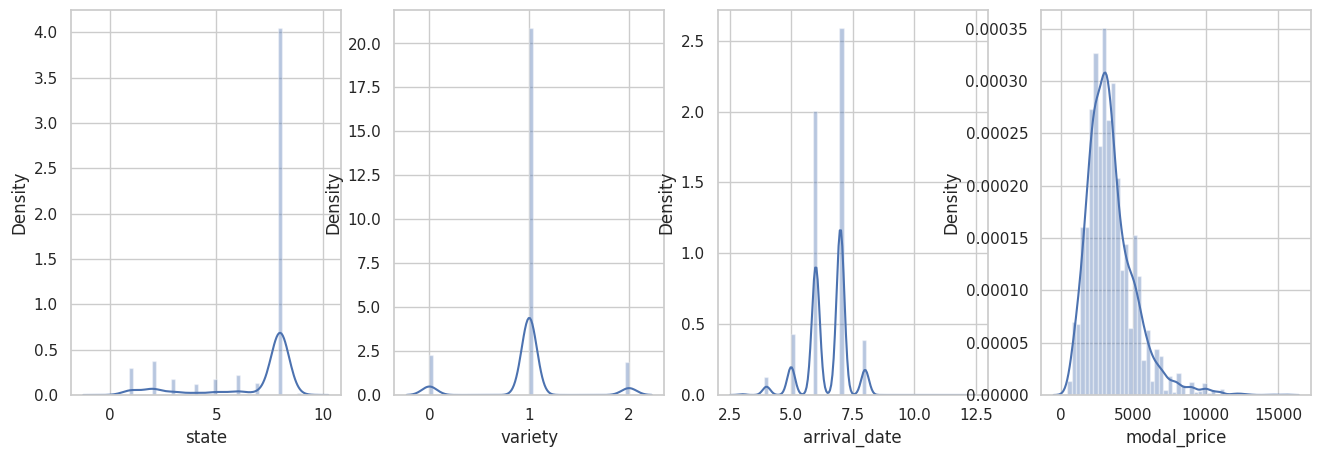

In [228]:
#outlier removal
# z score treatment
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
sns.distplot(data['state'])
plt.subplot(1,4,2)
sns.distplot(data['variety'])
plt.subplot(1,4,3)
sns.distplot(data['arrival_date'])
plt.subplot(1,4,4)
sns.distplot(data['modal_price'])
plt.show()


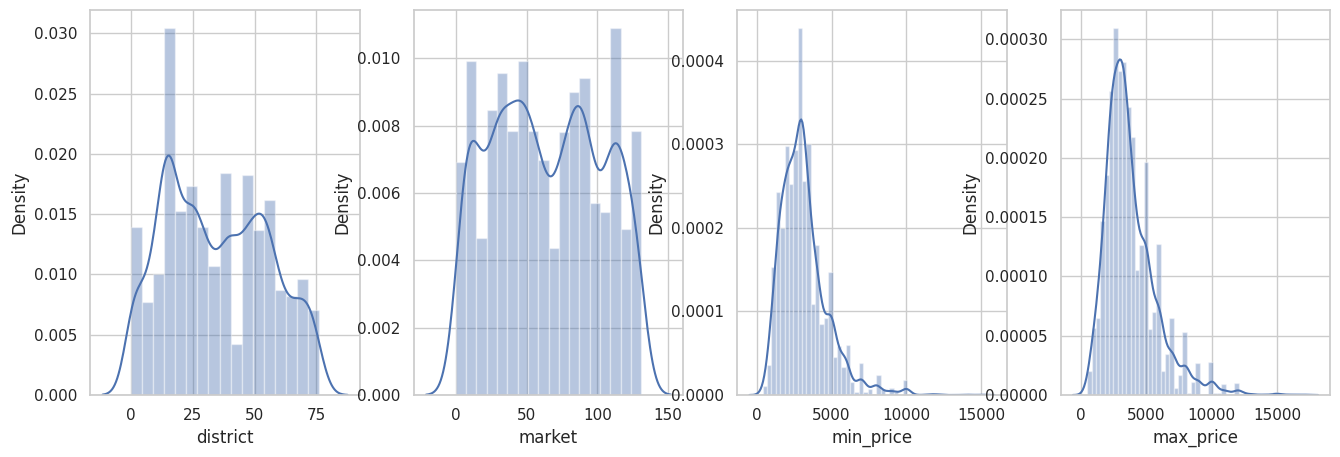

In [229]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
sns.distplot(data['district'])
plt.subplot(1,4,2)
sns.distplot(data['market'])
plt.subplot(1,4,3)
sns.distplot(data['min_price'])
plt.subplot(1,4,4)
sns.distplot(data['max_price'])
plt.show()


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4418 entries, 950 to 20942
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         4418 non-null   int64  
 1   district      4418 non-null   int64  
 2   market        4418 non-null   int64  
 3   variety       4418 non-null   int64  
 4   arrival_date  4418 non-null   int64  
 5   min_price     4418 non-null   float64
 6   max_price     4418 non-null   float64
 7   modal_price   4418 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 310.6 KB


In [231]:
#Finding the boundary values:
for column in data.columns:
 print("Highest allowed in {} is:{}".format(column,data[column].mean() + 3*data[column].std()))
 print("Lowest allowed in {} is:{}\n\n".format(column,data[column].mean() - 3*data[column].std()))

Highest allowed in state is:13.60642473298219
Lowest allowed in state is:-0.03874705077304519


Highest allowed in district is:96.59726918540382
Lowest allowed in district is:-27.556074074493907


Highest allowed in market is:176.6903246287602
Lowest allowed in market is:-48.03935133767828


Highest allowed in variety is:2.2018899766943107
Lowest allowed in variety is:-0.2367473782334688


Highest allowed in arrival_date is:9.016781186825604
Lowest allowed in arrival_date is:3.938402154052621


Highest allowed in min_price is:7864.939108364439
Lowest allowed in min_price is:-1557.0663152453799


Highest allowed in max_price is:9617.45891092767
Lowest allowed in max_price is:-2041.132075025584


Highest allowed in modal_price is:8495.56765158301
Lowest allowed in modal_price is:-1560.5961712751778




In [232]:
#Finding the outliers:
data[(data['state'] > 13.60642473298219) | (data['state'] < -0.03874705077304519)]
data[(data['variety'] > 2.2018899766943107) | (data['variety'] < -0.2367473782334688)]
data[(data['arrival_date'] > 9.016781186825604) | (data['arrival_date'] < 3.938402154052621)]
data[(data['modal_price'] > 8495.56765158301) | (data['modal_price'] < -1560.5961712751778)]
data[(data['district'] > 96.59726918540382) | (data['district'] < -27.556074074493907)]
data[(data['market'] > 176.6903246287602) | (data['market'] < -48.03935133767828)]
data[(data['min_price'] > 7864.939108364439) | (data['min_price'] < -1557.0663152453799)]
data[(data['max_price'] > 9617.45891092767) | (data['max_price'] < -2041.132075025584)]

,state,district,market,variety,arrival_date,min_price,max_price,modal_price
2689,1,46,110,1,4,7000.0,12700.0,9500
2904,1,49,81,1,3,10000.0,10000.0,10000
2905,1,49,81,1,3,10000.0,10000.0,10000
2907,1,49,81,1,4,10000.0,10000.0,10000
2908,1,49,81,1,4,10000.0,10000.0,10000
...,...,...,...,...,...,...,...,...
17031,8,17,29,1,4,9400.0,11000.0,10200
17032,8,17,29,1,4,9400.0,10500.0,10000
17033,8,17,29,1,4,9400.0,10300.0,9800
17034,8,17,29,1,4,9400.0,10300.0,9820


In [233]:
# capping the outliers:
upper_limit={}
lower_limit={}
for column in data.columns:
  upper_limit[column]=data[column].mean() + 3*data[column].std()
  lower_limit[column]=data[column].mean() - 3*data[column].std()
print(upper_limit)
print(lower_limit)

{'state': 13.60642473298219, 'district': 96.59726918540382, 'market': 176.6903246287602, 'variety': 2.2018899766943107, 'arrival_date': 9.016781186825604, 'min_price': 7864.939108364439, 'max_price': 9617.45891092767, 'modal_price': 8495.56765158301}
{'state': -0.03874705077304519, 'district': -27.556074074493907, 'market': -48.03935133767828, 'variety': -0.2367473782334688, 'arrival_date': 3.938402154052621, 'min_price': -1557.0663152453799, 'max_price': -2041.132075025584, 'modal_price': -1560.5961712751778}


In [234]:
#applying the capping:
for column in data.columns:
 data[column] = np.where(
  data[column]>upper_limit[column],
  upper_limit[column],
  np.where(
  data[column]<lower_limit[column],
  lower_limit[column],
  data[column]
)
)


In [235]:
# Checking the statistics using “Describe” Function
data.describe()


,state,district,market,variety,arrival_date,min_price,max_price,modal_price
count,4418.000000,4418.000000,4418.000000,4418.000000,4418.000000,4418.000000,4418.000000,4418.000000
mean,6.783839,34.520598,64.325487,0.982571,6.478828,3129.527108,3760.494008,3441.299905
std,2.274195,20.692224,37.454946,0.406440,0.836323,1473.487605,1834.633006,1572.733384
min,0.000000,0.000000,0.000000,0.000000,3.938402,400.000000,500.000000,450.000000
25%,7.000000,15.000000,32.000000,1.000000,6.000000,2000.000000,2500.000000,2350.000000
50%,8.000000,33.000000,62.000000,1.000000,7.000000,2950.000000,3300.000000,3155.000000
75%,8.000000,52.000000,95.000000,1.000000,7.000000,3850.000000,4700.000000,4200.000000
max,9.000000,76.000000,131.000000,2.000000,9.016781,7864.939108,9617.458911,8495.567652


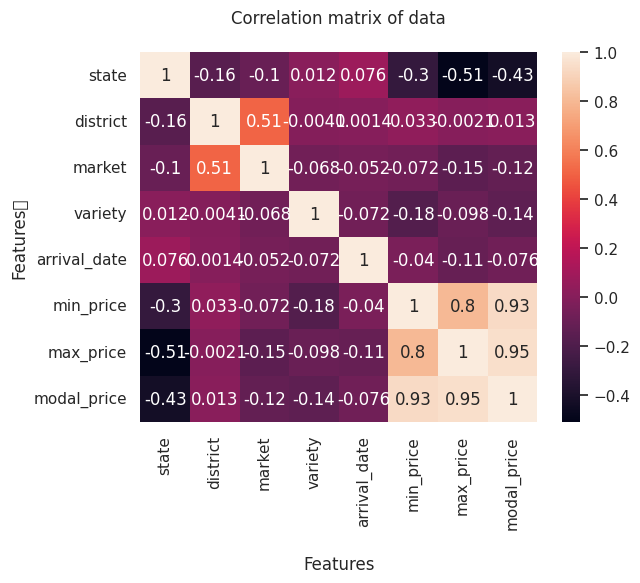

max_price    state         -0.509531
state        max_price     -0.509531
             modal_price   -0.431689
modal_price  state         -0.431689
state        min_price     -0.298588
                              ...   
variety      variety        1.000000
market       market         1.000000
district     district       1.000000
max_price    max_price      1.000000
modal_price  modal_price    1.000000
Length: 64, dtype: float64


In [236]:
# heatmap of correlation matrix with annotations in 2 different shades
cor=data.corr()
hm1 = sns.heatmap(cor, annot = True)
hm1.set(xlabel='\nFeatures', ylabel='Features\t', title = "Correlation matrix of data\n")
plt.show()
# sorting the correlation pairs in ascending order
corr_pairs = cor.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)


In [237]:
data.drop(['max_price','min_price'],axis=1,inplace=True)

In [238]:
features=['state','variety','arrival_date','market','district']
x=data[features]# since these are the feature we take them as x
y = data['modal_price']# since price is the output or label we'll take it as y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)
print("\nShape of x_train:\n{}".format(x_train.shape))
print("\nShape of x_test:\n{}".format(x_test.shape))
print("\nShape of y_train:\n{}".format(y_train.shape))
print("\nShape of y_test:\n{}".format(y_test.shape))


Shape of x_train:
(3534, 5)

Shape of x_test:
(884, 5)

Shape of y_train:
(3534,)

Shape of y_test:
(884,)


In [249]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
model = open('standard_scaler.pkl', 'wb')
pickle.dump(sc,model)
model.close()

In [240]:
model = LinearRegression() #Create a linear regression model
model.fit(x_train,y_train) #Fit the data
#Predict the value of y based for the test data
y_prediction_regression = model.predict(x_test)
PricePredict = pd.DataFrame({'Actual price': y_test, 'Predicted price': y_prediction_regression})
print(PricePredict)
print(model.score(x_test,y_test))

       Actual price  Predicted price
15298   1000.000000      3215.723867
19747   1500.000000      1974.830172
19112   6010.000000      3428.251399
19187   1550.000000      2943.591135
16740   2140.000000      3173.263325
...             ...              ...
16019   4850.000000      3254.376582
17420   3200.000000      3207.881953
19863   1800.000000      3409.645599
2907    8495.567652      5374.631194
16637   1910.000000      3427.844571

[884 rows x 2 columns]
0.252189609982546


In [241]:
# Fit the decision tree model
model = DecisionTreeRegressor(max_depth=8)
model.fit(x_train, y_train)
#predict
y_prediction_decision = model.predict(x_test)
#rsquare value
r2_score(y_test,y_prediction_decision)

0.7247830509272881

In [242]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
  K = K+1
  model = KNeighborsRegressor(n_neighbors = K)
  model.fit(x_train, y_train) #fit the model
  pred=model.predict(x_test) #make prediction on test set
  error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 984.9735817947382
RMSE value for k=  2 is: 815.7571870586837
RMSE value for k=  3 is: 794.6752377846449
RMSE value for k=  4 is: 784.6780169619706
RMSE value for k=  5 is: 787.8346343641294
RMSE value for k=  6 is: 785.3634819876609
RMSE value for k=  7 is: 802.9031930112108
RMSE value for k=  8 is: 811.3030698200264
RMSE value for k=  9 is: 813.0623278915552
RMSE value for k=  10 is: 827.803566864452
RMSE value for k=  11 is: 828.9388323006515
RMSE value for k=  12 is: 833.9662863552746
RMSE value for k=  13 is: 838.6196422728336
RMSE value for k=  14 is: 841.9753039941257
RMSE value for k=  15 is: 849.7975760967956
RMSE value for k=  16 is: 852.6637144791897
RMSE value for k=  17 is: 863.8636622949464
RMSE value for k=  18 is: 871.2362388991695
RMSE value for k=  19 is: 878.079589569918
RMSE value for k=  20 is: 887.1359796970003


<Axes: >

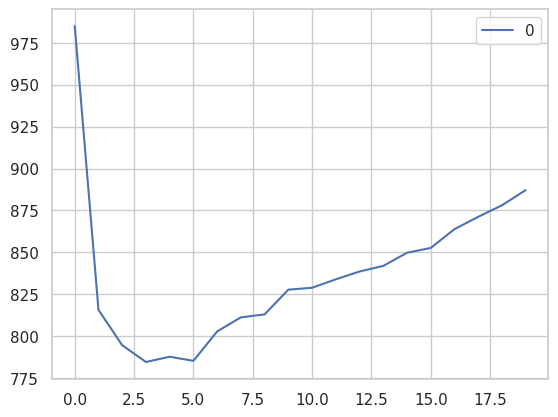

In [243]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val)
curve.plot()

In [244]:
#  KNN regression
knn = KNeighborsRegressor(n_neighbors=4)
# fit the model using the training data and training 
knn.fit(x_train, y_train)
y_prediction_knn=knn.predict(x_test)
print(knn.score(x_test, y_test))
print("______________________________________________________________________________________________")
PricePredict = pd.DataFrame({'Actual price': y_test, 'Predicted price': y_prediction_knn})
print(PricePredict)

0.7604847957449593
______________________________________________________________________________________________
       Actual price  Predicted price
15298   1000.000000      1000.000000
19747   1500.000000      1650.000000
19112   6010.000000      5897.500000
19187   1550.000000      2287.500000
16740   2140.000000      1968.750000
...             ...              ...
16019   4850.000000      4042.500000
17420   3200.000000      3292.500000
19863   1800.000000      2000.000000
2907    8495.567652      7248.891913
16637   1910.000000      1833.750000

[884 rows x 2 columns]


In [245]:
report=pd.DataFrame()
report['Actual values']=y_test
report['Prediction for regression']=y_prediction_regression
report['Prediction for decision tree']=y_prediction_decision
report['Prediction for KNN ']=y_prediction_knn

report.head()

,Actual values,Prediction for regression,Prediction for decision tree,Prediction for KNN
15298,1000.0,3215.723867,1000.000000,1000.00
19747,1500.0,1974.830172,1761.855670,1650.00
19112,6010.0,3428.251399,5200.312500,5897.50
19187,1550.0,2943.591135,2353.242574,2287.50
16740,2140.0,3173.263325,1986.798701,1968.75


Mean Squared Error: 615719.5903033706
Root Mean Squared Error: 784.6780169619706


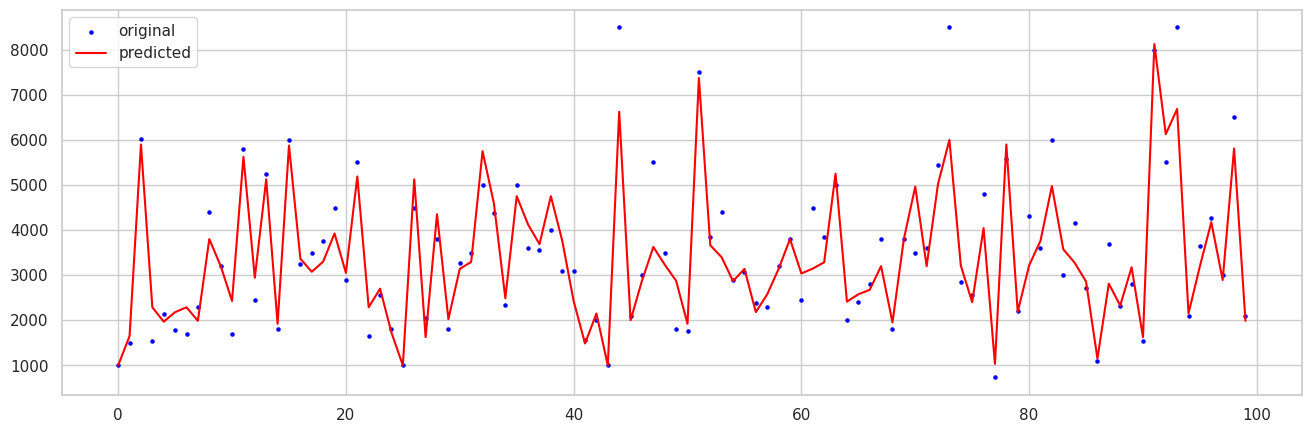

In [246]:
mse =mean_squared_error(y_test, y_prediction_knn)
print("Mean Squared Error:",mse)
 
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

#plot the predicted result.
x_ax=range(100)
y_test_range=y_test[:100]
y_prediction_knn_range=y_prediction_knn[:100]
plt.figure(figsize=(16,5))
plt.scatter(x_ax, y_test_range, s=5, color="blue", label="original")
plt.plot(x_ax, y_prediction_knn_range, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

In [247]:
import pickle
model_regression = open('knn_regression_model.pkl', 'wb')
pickle.dump(knn,model_regression)
model_regression.close()